In [9]:
# Import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

demog_data = pd.read_csv('dataset.csv')
demog_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success

Marital status: The marital status of the student. (Categorical)

Application mode: The method of application used by the student. (Categorical)

Application order: The order in which the student applied. (Numerical)

Course: The course taken by the student. (Categorical)

Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)

Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)

Nacionality: The nationality of the student. (Categorical)

Mother's qualification: The qualification of the student's mother. (Categorical)

Father's qualification: The qualification of the student's father. (Categorical)

Mother's occupation: The occupation of the student's mother. (Categorical)

Father's occupation: The occupation of the student's father. (Categorical)

Displaced: Whether the student is a displaced person. (Categorical)

Educational special needs: Whether the student has any special educational needs. (Categorical)

Debtor: Whether the student is a debtor. (Categorical)

Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)

Gender: The gender of the student. (Categorical)

Scholarship holder: Whether the student is a scholarship holder. (Categorical)

Age at enrollment: The age of the student at the time of enrollment. (Numerical)

International: Whether the student is an international student. (Categorical)

Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)

Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)

Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)

Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

More information about the meaning of the values of the variables at :
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [8]:
def overview(df):
    
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print(df.info())
    print("\nMissing values:", df.isnull().sum().values.sum())
   
    for col in df.columns:
        print('\nUnique values of',col, 'are : ',df[col].unique(), "\nand Number of Unique values:",
              len(df[col].unique()))
        
    print("\nNumber of duplicated rows: ",df.duplicated().sum())
    
overview(demog_data)    

Number of rows:  4424

Number of features: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  


In [21]:
print( 'The completion rate is : ',round((demog_data['Target'].value_counts()[0]/4424)*100,2),"%")

The completion rate is :  49.93 %


Target
Dropout     1421
Enrolled     794
Graduate    2209
Name: Marital status, dtype: int64

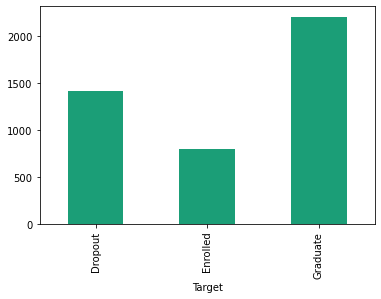

In [16]:
# Target Variable Frequency 

demog_data.groupby('Target').count()['Marital status'].plot(kind = 'bar',colormap='Dark2')
demog_data.groupby('Target').count()['Marital status']

The problem is formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes. The majority class, Graduate, represents 50% of the records (2209 of 4424) and Dropout represents 32% of total records (1421 of 4424), while the minority class, Enrolled, represents 18% of total records (794 of 4424). This might result in a high prediction accuracy driven by the majority class at the expense of a poor performance of the minority class.

In [23]:
categorical_cols = ["Marital status", "Application mode", "Application order", "Course", "Daytime/evening attendance",
                    "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation",
                    "Father's occupation", "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Gender",
                    "Scholarship holder", "International"]

quantitative_cols = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                  'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                  'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Age at enrollment', 'Inflation rate', 'GDP', 'Unemployment rate']

# Description for quantitative variables
Description = demog_data[quantitative_cols].describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
Description.loc['skew'] = demog_data[quantitative_cols].skew()

Description     

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Age at enrollment,Inflation rate,GDP,Unemployment rate
mean,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,23.265145,1.228029,0.001969,11.566139
std,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,7.587816,1.382711,2.269935,2.663850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,-0.800000,-4.060000,7.600000
25%,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,19.000000,0.300000,-1.700000,9.400000
50%,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,20.000000,1.400000,0.320000,11.100000
75%,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,25.000000,2.600000,1.790000,13.900000
max,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,70.000000,3.700000,3.510000,16.200000
skew,4.169049,1.619041,0.976637,0.766262,-1.568146,8.207403,4.634820,0.788114,0.336497,0.306279,-1.313650,7.267701,2.054988,0.252375,-0.394068,0.212051


We observe that the following columns are highly skewed :
Curricular units 1st sem (credited), Curricular units 1st sem (enrolled),Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited),Curricular units 2nd sem (without evaluations),Age at enrollment

In [2]:
# Encoding the target column

demog_data['Target'] = demog_data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2})

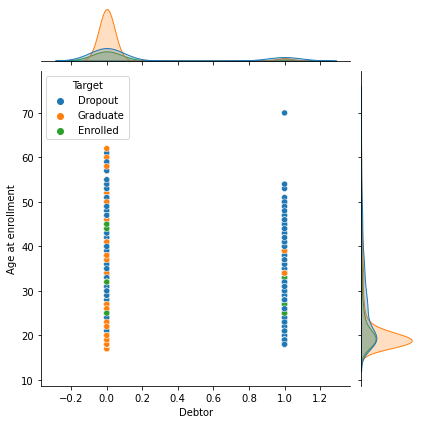

In [10]:
# Scatterplot of the debtor variable and the age of enrollment of the student.

import seaborn as sns
sns.jointplot(data=demog_data, x="Debtor", y="Age at enrollment", hue="Target")

Debtors tend to be younger in comparison with non-debtors and dropout more.

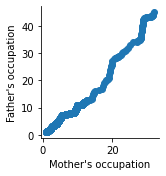

In [33]:
# qq-plot of mother's and father's occupation

from seaborn_qqplot import pplot
pplot(data=demog_data, x="Mother's occupation", y="Father's occupation",kind='qq')

# they follow the same distribution 

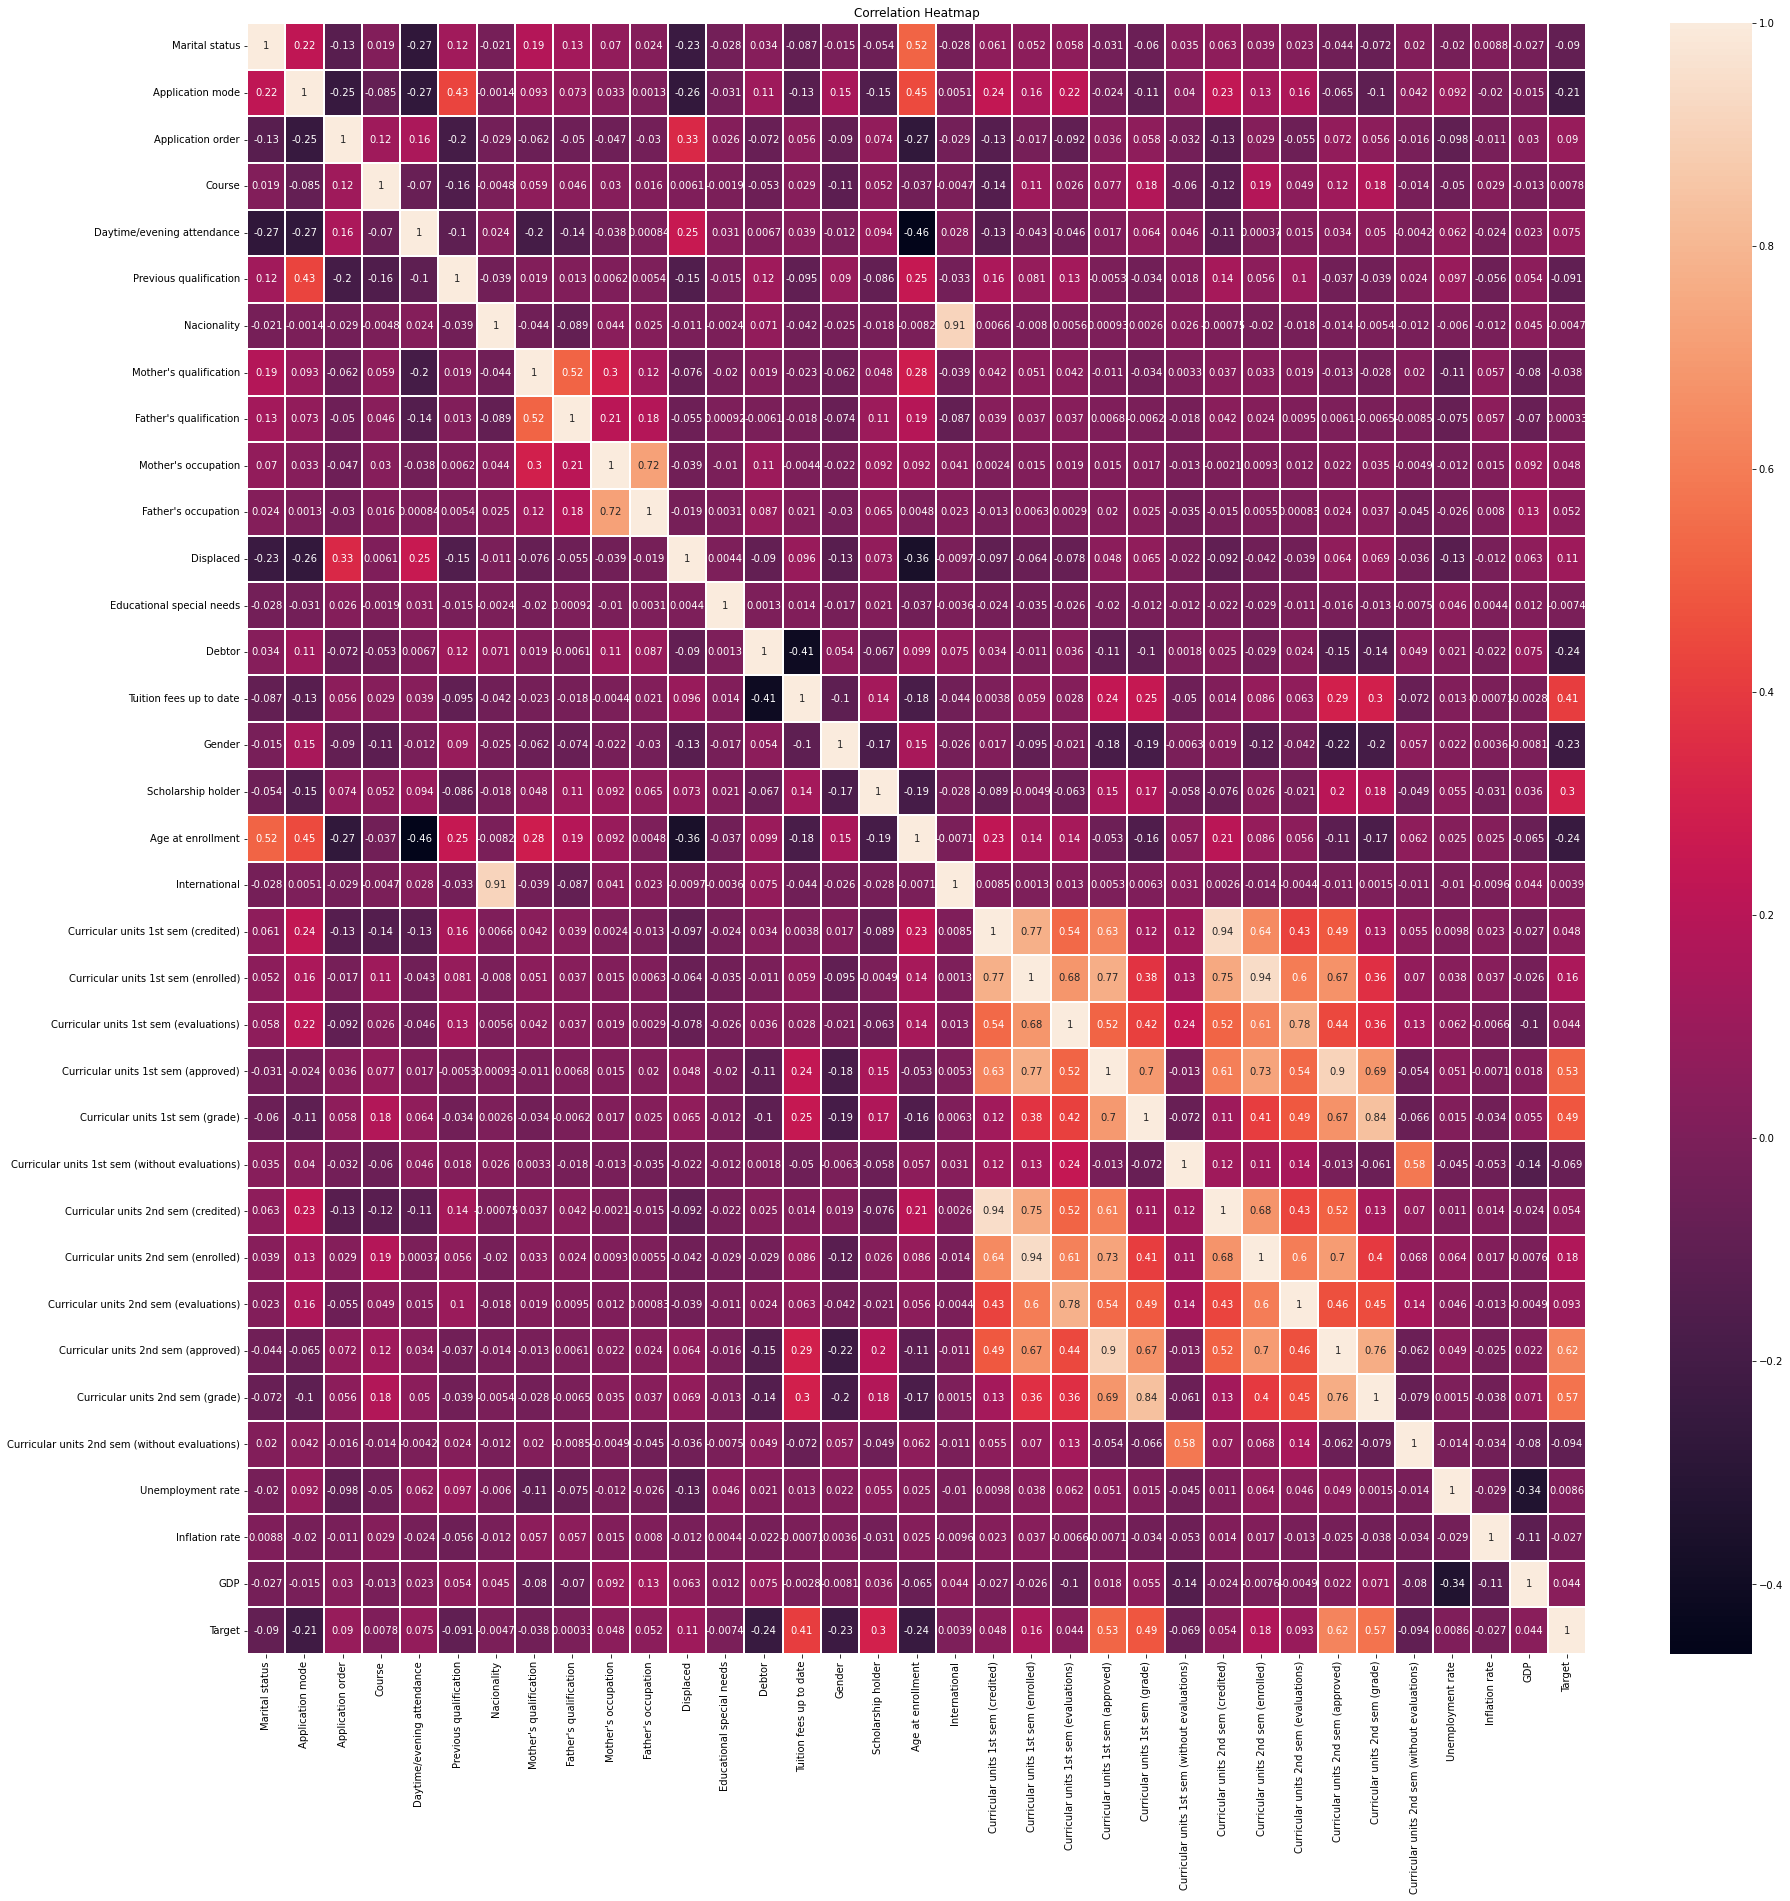

In [22]:
# Correlation of the data

plt.figure(figsize=(30, 30))
sns.heatmap(demog_data.corr() , annot=True, linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

The following columns have low absolute correlation values and may not provide significant predictive power for the target variable 'Target' :

Course, Gender,Daytime/evening attendance, Previous qualification,                      Nationality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Unemployment rate, Inflation rate, GDP

So, we may consider removing correlated features from analysis or/and dimentionality reduction to improve our model's performance.

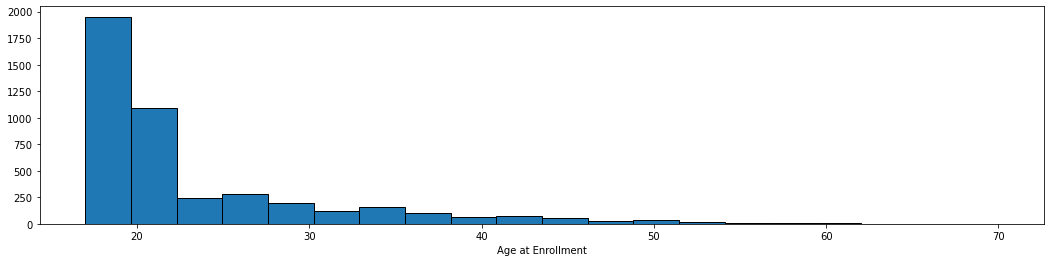

In [4]:
fig,ax = plt.subplots(figsize=(18, 4))
ax.hist(demog_data['Age at enrollment'],bins =20, edgecolor='black')
plt.xlabel('Age at Enrollment')

plt.show()

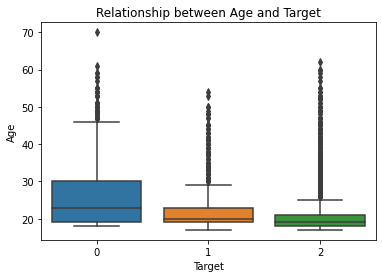

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Target', y='Age at enrollment', data=demog_data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

Older Students are more likely to dropout

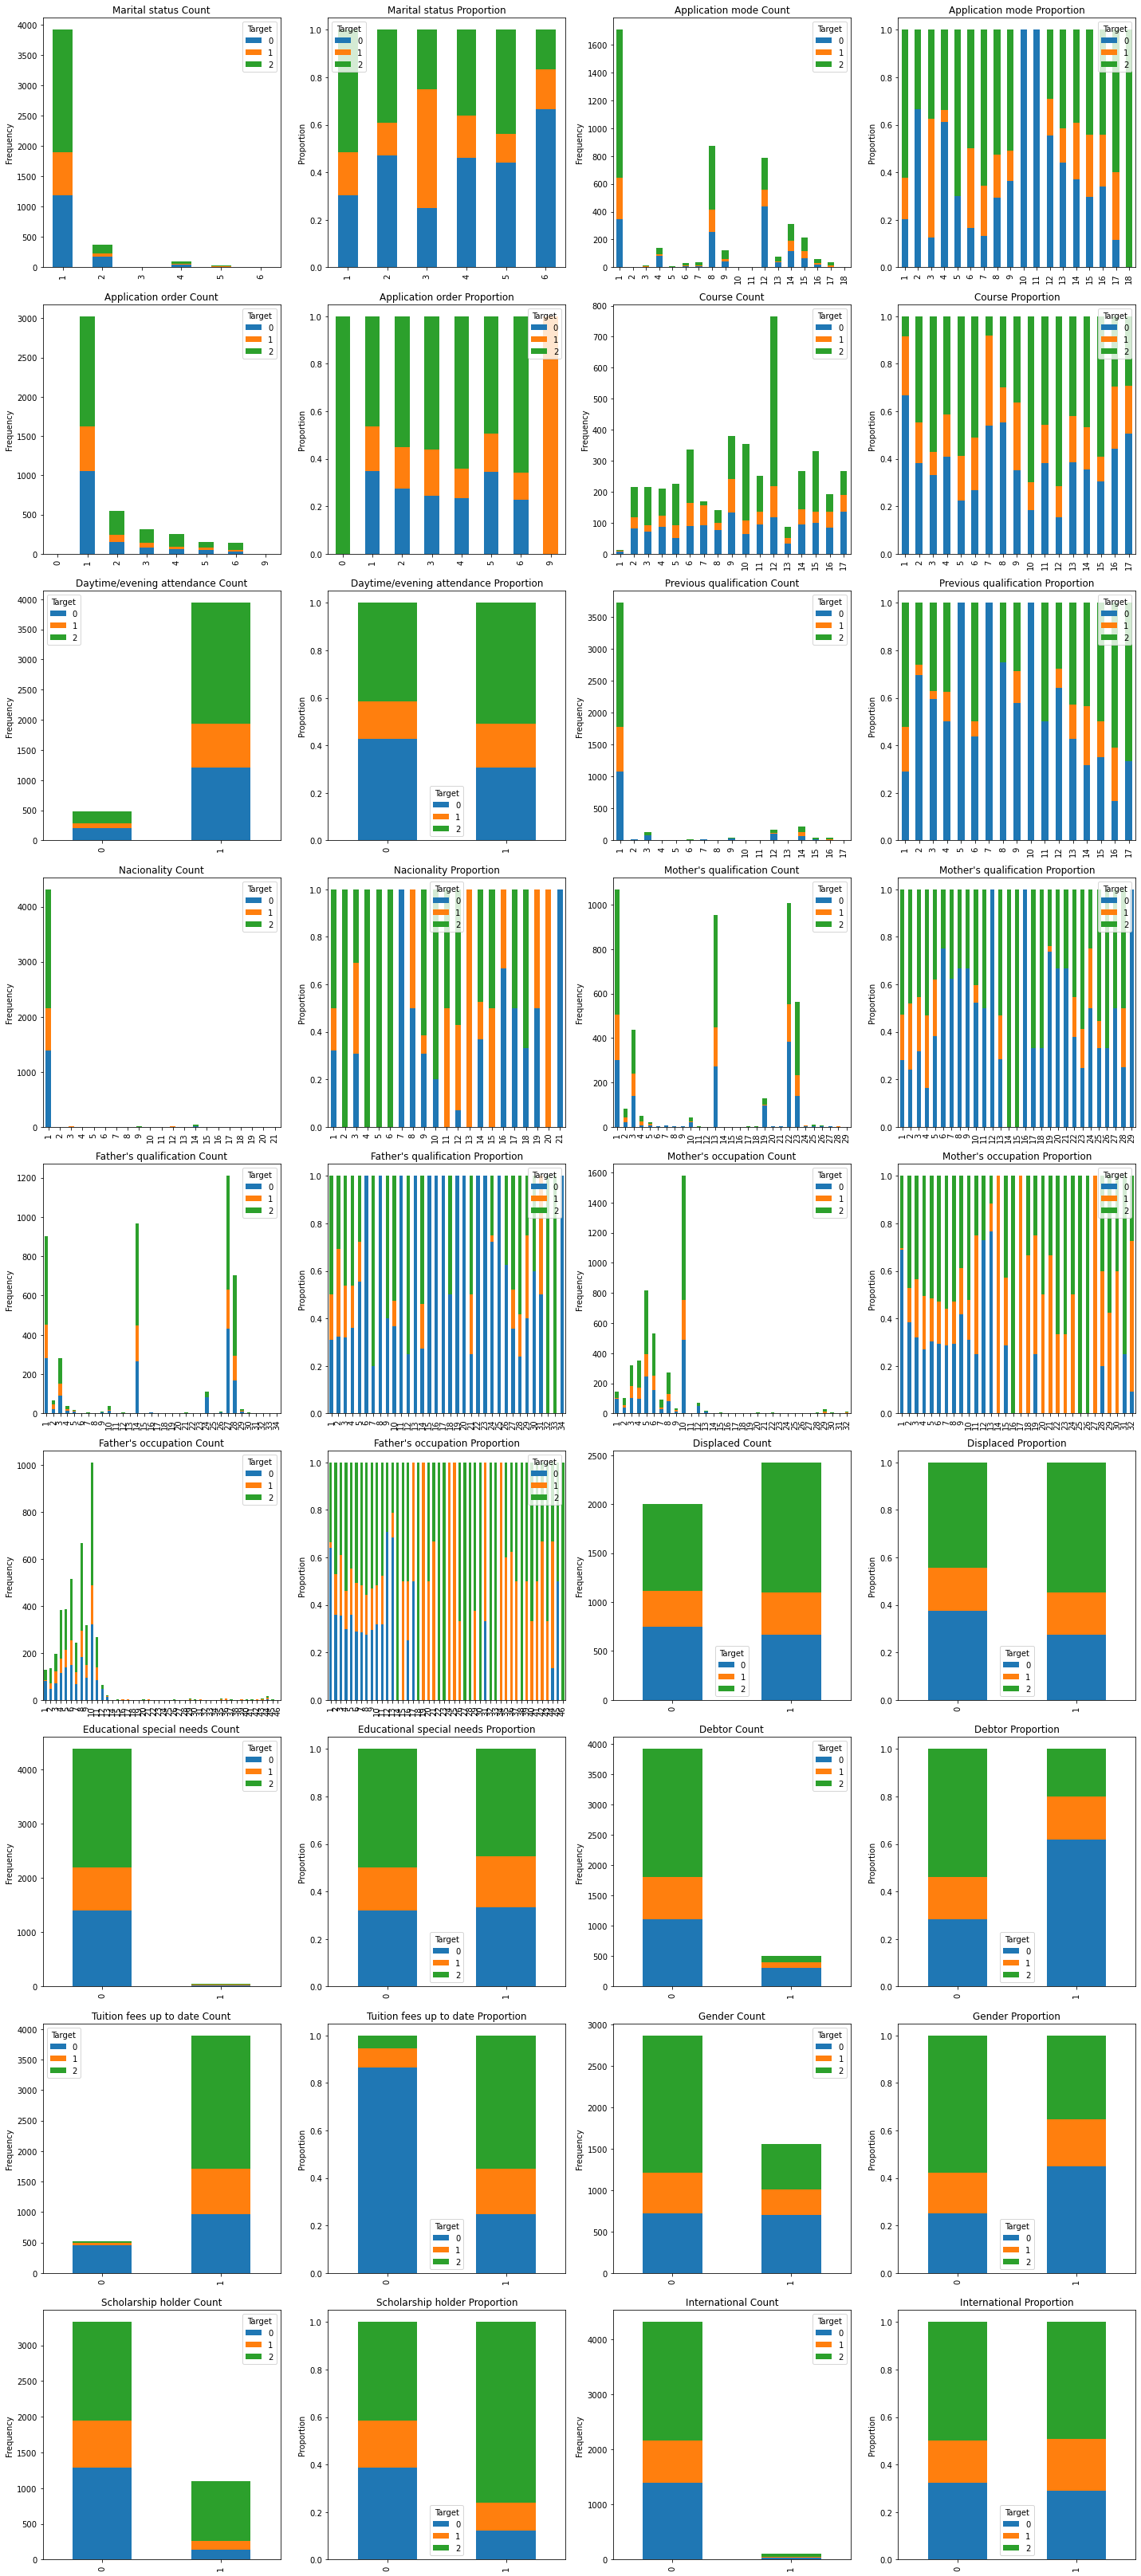

In [27]:
# Visualization of categorical variables 

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20,45))

for i in range(len(categorical_cols)):
    row1 = i//2
    col1 = (i % 2) * 2
    col2 = col1 + 1
    counts = demog_data.groupby([categorical_cols[i], 'Target'])['Course'].count().unstack()
    counts_norm = counts.apply(lambda x: x/x.sum(), axis=1)
    counts.plot(kind='bar', stacked=True, ax=axes[row1][col1])
    axes[row1][col1].set_title(categorical_cols[i] + " Count", fontsize=12)
    axes[row1][col1].set_xlabel('')
    axes[row1][col1].set_ylabel('Frequency')
    axes[row1][col1].legend(title='Target')

    counts_norm.plot(kind='bar', stacked=True, ax=axes[row1][col2])
    axes[row1][col2].set_title(categorical_cols[i] + " Proportion", fontsize=12)
    axes[row1][col2].set_xlabel('')
    axes[row1][col2].set_ylabel('Proportion')
    axes[row1][col2].legend(title='Target')


plt.tight_layout()
plt.show()

Some Observations:

1. The proportion of students with unpaid fees up to date that dropout is more than 80%
2. The proportion of students with a scolarship that graduates is more than 70%
3. Around 65% of the debtors dropout and around 65% of the ones without debt graduate.

<AxesSubplot:xlabel='Scholarship holder', ylabel='Inflation rate'>

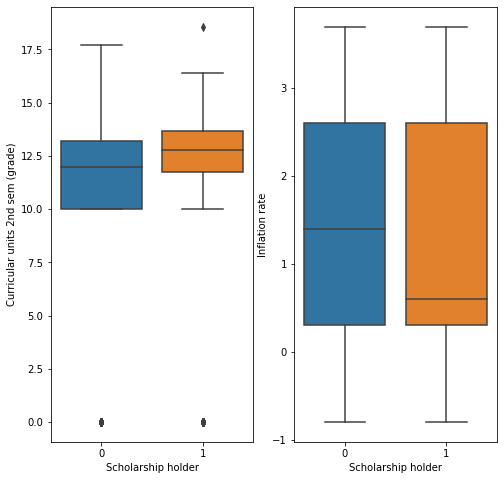

In [55]:
# Boxplots of scolarship holder versus inflation rate and 2nd semester grade.

fig, axes = plt.subplots(nrows=2, figsize=(8,8))
ax1 = plt.subplot(121)
sns.boxplot(x='Scholarship holder', y='Curricular units 2nd sem (grade)', data=demog_data) 

ax2 = plt.subplot(122)
sns.boxplot(x='Scholarship holder', y='Inflation rate', data=demog_data)


From the first plot is obvious that students that did not have a scolarship took lower grades during the second semester in comparison with those that had a scolarship.